In [1]:
%cd ../../

/mnt/sda/otani/Experiments/eval-detection


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from src.utils import map_single
from matplotlib.patches import Rectangle
from src.extensions.metrics.ot_cost import get_cmap, get_ot_cost
from src.utils import map_single
%matplotlib inline

In [ ]:
def create_image(duck_xys, donky_xys):
    width, height = 500, 400
    img = np.ones((height, width, 3), dtype=np.uint8) * 255

    donky = Image.open("data/sample_img/k0217_4.jpg")
    donky = donky.resize((np.array(donky.size)/3).astype(int))
    donky = np.asarray(donky)
    donky_h, donky_w = donky.shape[:2]
    duck = Image.open("data/sample_img/k0228_1.jpg")
    duck = duck.resize((np.array(duck.size)/4).astype(int))
    duck = np.asarray(duck)
    duck_h, duck_w = duck.shape[:2]

    duck_bboxes = []
    for x, y in duck_xys:
        img[y:y+duck_h, x:x+duck_w, :] = duck
        duck_bboxes.append([x, y, x+duck_w, y+duck_h, 1.])

    donky_bboxes = []
    for x, y in donky_xys:
        img[y:y+donky_h, x:x+donky_w, :] = donky
        donky_bboxes.append([x, y, x+donky_w, y+donky_h, 1.])

    return img, np.asarray(duck_bboxes), np.asarray(donky_bboxes)

def show_bboxes(ax, bboxes, color):
    for x1, y1, x2, y2, c in bboxes:
        rect = Rectangle((x1, y1), x2-x1, y2-y1, lw=2, ec=color, fc="None")
        ax.add_patch(rect)  
        ax.text(x1, y1, f"{c:.2}")
    return plt.gcf()


img, duck_bboxes, donky_bboxes = create_image([[20, 20]], [[200, 200]])
plt.imshow(img)
show_bboxes(plt.gca(), duck_bboxes, "g")
show_bboxes(plt.gca(), donky_bboxes, "g")

Text(0.5, 1.0, 'mAP: 0.66 | OC-cost: 0.11')

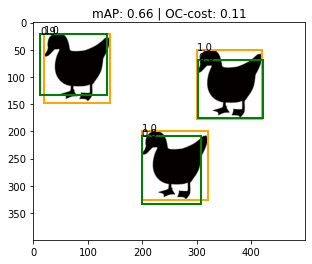

In [23]:
cmap_f = lambda x, y: get_cmap(x, y, alpha=0.5, beta=0.6)

def cvrt_anno(bboxes, labels):
    anno = {}
    anno["bboxes"] = bboxes[:,:4]
    anno["labels"] = np.asarray(labels)
    return anno

In [103]:
def detectorA_1():
    img, duck_bboxes, _ = create_image([[20, 20], [200, 200], [300, 50]], [])
    duck_det_bboxes = duck_bboxes.copy()[:2]
    duck_det_bboxes[:, -1] = [0.8, 0.9]
    rng = np.random.default_rng()
    duck_det_bboxes[:, :4] = duck_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(duck_det_bboxes), 4)) - 20

    plt.imshow(img)
    # show_bboxes(plt.gca(), duck_bboxes, "orange")
    show_bboxes(plt.gca(), duck_det_bboxes, "g")

    anno = cvrt_anno(duck_bboxes, [0,0,0])
    ot_cost = get_ot_cost([duck_bboxes], [duck_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([duck_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/a1.pdf", bbox_inches="tight")
    plt.close()
    return [duck_det_bboxes, np.array([]).reshape(0, 5)], anno, ot_cost

def detectorA_2():
    img, duck_bboxes, _ = create_image([[100, 100], [200, 250]], [])
    duck_det_bboxes = duck_bboxes.copy()
    duck_det_bboxes[:, -1] = [0.6, 0.7]
    rng = np.random.default_rng()
    duck_det_bboxes[:, :4] = duck_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(duck_det_bboxes), 4)) - 20
    duck_det_bboxes[-1, 0] += 100
    duck_det_bboxes[-1, 2] += 100
    plt.imshow(img)
    show_bboxes(plt.gca(), duck_det_bboxes[:1], "g")
    show_bboxes(plt.gca(), duck_det_bboxes[1:], "r")


    anno = cvrt_anno(duck_bboxes, [0,0,])
    ot_cost = get_ot_cost([duck_bboxes, np.array([]).reshape(0, 5)], [duck_det_bboxes[:1], duck_det_bboxes[1:]], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([duck_det_bboxes, np.asarray([]).reshape(0, 5)], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/a2.pdf", bbox_inches="tight")
    plt.close()
    return [duck_det_bboxes, np.asarray([]).reshape(0, 5)], anno, ot_cost

def detectorA_3():
    img, _, donky_bboxes = create_image([], [[200, 100]])
    donky_det_bboxes = donky_bboxes.copy()
    donky_det_bboxes[:, -1] = [0.6]
    rng = np.random.default_rng()
    donky_det_bboxes[:, :4] = donky_det_bboxes[:, :4] + rng.integers(low=40, high=140, size=(len(donky_det_bboxes), 4)) - 20

    plt.imshow(img)
    show_bboxes(plt.gca(), donky_det_bboxes, "r")

    anno = cvrt_anno(donky_bboxes, [1])
    ot_cost = get_ot_cost([np.array([]).reshape(0, 5), donky_bboxes], [np.array([]).reshape(0, 5), donky_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5), donky_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/a3.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), donky_det_bboxes], anno, ot_cost

detections = []
anns = []
ot_costs = []   
dets, ann, oc = detectorA_1()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorA_2()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorA_3()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
print(f"{np.mean(ot_costs):.3}")
map_single.eval_map(detections, anns, iou_thr=0.5)

0.371

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 5   | 4    | 0.600  | 0.550 |
| 1     | 1   | 1    | 0.000  | 0.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.275 |
+-------+-----+------+--------+-------+


(0.2750000059604645,
 [{'num_gts': 5,
   'num_dets': 4,
   'recall': array([0.2, 0.4, 0.4, 0.6]),
   'precision': array([1.       , 1.       , 0.6666667, 0.75     ], dtype=float32),
   'ap': 0.55},
  {'num_gts': 1,
   'num_dets': 1,
   'recall': array([0.]),
   'precision': array([0.], dtype=float32),
   'ap': 0.0}])

In [104]:
def detectorB_1():
    img, duck_bboxes, _ = create_image([[20, 20], [200, 200], [300, 50]], [])
    duck_det_bboxes = duck_bboxes.copy()
    fp_dets = np.asarray([[50, 250, 200, 300, 0.], [300, 300, 450, 370, 0.]])
    duck_det_bboxes = np.vstack([duck_det_bboxes, fp_dets])
    duck_det_bboxes[:, -1] = [0.8, 0.9, 0.6, 0.2, 0.7]
    rng = np.random.default_rng()
    duck_det_bboxes[:, :4] = duck_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(duck_det_bboxes), 4)) - 20

    plt.imshow(img)
    # show_bboxes(plt.gca(), duck_bboxes, "orange")
    show_bboxes(plt.gca(), duck_det_bboxes[:3], "g")
    show_bboxes(plt.gca(), duck_det_bboxes[3:], "r")

    anno = cvrt_anno(duck_bboxes, [0,0,0])
    ot_cost = get_ot_cost([duck_bboxes], [duck_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([duck_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    # plt.axis("off")
    plt.savefig("outputs/teaser/b1.pdf", bbox_inches="tight")
    plt.close()
    return [duck_det_bboxes, np.array([]).reshape(0, 5)], anno, ot_cost

def detectorB_2():
    img, duck_bboxes, _ = create_image([[100, 100], [200, 250]], [])
    plt.imshow(img)


    anno = cvrt_anno(duck_bboxes, [0,0,])
    ot_cost = get_ot_cost([duck_bboxes, np.array([]).reshape(0, 5)], [np.array([]).reshape(0, 5), np.array([]).reshape(0, 5)], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5)], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/b2.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), np.array([]).reshape(0, 5)], anno, ot_cost

def detectorB_3():
    img, _, donky_bboxes = create_image([], [[200, 100]])
    donky_det_bboxes = np.array([]).reshape(0, 5)
    plt.imshow(img)

    anno = cvrt_anno(donky_bboxes, [1])
    ot_cost = get_ot_cost([np.array([]).reshape(0, 5), donky_bboxes], [np.array([]).reshape(0, 5), donky_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5), donky_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/b3.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), donky_det_bboxes], anno, ot_cost

detections = []
anns = []
ot_costs = []   
dets, ann, oc = detectorB_1()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorB_2()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorB_3()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
print(f"{np.mean(ot_costs):.3}")
map_single.eval_map(detections, anns, iou_thr=0.5)

0.508

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 5   | 5    | 0.600  | 0.550 |
| 1     | 1   | 0    | 0.000  | 0.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.275 |
+-------+-----+------+--------+-------+


(0.2750000059604645,
 [{'num_gts': 5,
   'num_dets': 5,
   'recall': array([0.2, 0.4, 0.4, 0.6, 0.6]),
   'precision': array([1.       , 1.       , 0.6666667, 0.75     , 0.6      ],
         dtype=float32),
   'ap': 0.55},
  {'num_gts': 1,
   'num_dets': 0,
   'recall': array([], dtype=float64),
   'precision': array([], dtype=float32),
   'ap': 0.0}])

In [113]:
def detectorC_1():
    img, duck_bboxes, _ = create_image([[20, 20], [200, 200], [300, 50]], [])
    donky_det_bboxes = duck_bboxes.copy()
    donky_det_bboxes[:, -1] = [0.8, 0.8, 0.7]
    rng = np.random.default_rng()
    donky_det_bboxes[:, :4] = donky_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(donky_det_bboxes), 4)) - 20

    plt.imshow(img)
    show_bboxes(plt.gca(), donky_det_bboxes, "r")

    anno = cvrt_anno(duck_bboxes, [0,0,0])
    ot_cost = get_ot_cost([duck_bboxes, np.array([]).reshape(0, 5)], [np.array([]).reshape(0, 5), donky_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5), donky_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/c1.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), donky_det_bboxes], anno, ot_cost

def detectorC_2():
    img, duck_bboxes, _ = create_image([[100, 100], [200, 250]], [])
    donky_det_bboxes = duck_bboxes.copy()
    donky_det_bboxes[:, -1] = [0.8, 0.7]
    rng = np.random.default_rng()
    donky_det_bboxes[:, :4] = donky_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(donky_det_bboxes), 4)) - 20
    donky_det_bboxes[:, 0] += 100
    donky_det_bboxes[:, 2] += 100

    plt.imshow(img)
    show_bboxes(plt.gca(), donky_det_bboxes, "r")

    anno = cvrt_anno(duck_bboxes, [0,0,])
    ot_cost = get_ot_cost([duck_bboxes, np.array([]).reshape(0, 5)], [np.array([]).reshape(0, 5), donky_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5), donky_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/c2.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), donky_det_bboxes], anno, ot_cost

def detectorC_3():
    img, _, donky_bboxes = create_image([], [[200, 100]])
    donky_det_bboxes = donky_bboxes.copy()
    donky_det_bboxes[:, -1] = [0.9]
    rng = np.random.default_rng()
    donky_det_bboxes[:, :4] = donky_det_bboxes[:, :4] + rng.integers(low=0, high=40, size=(len(donky_det_bboxes), 4)) - 20

    plt.imshow(img)
    show_bboxes(plt.gca(), donky_det_bboxes, "g")

    anno = cvrt_anno(donky_bboxes, [1])
    ot_cost = get_ot_cost([np.array([]).reshape(0, 5), donky_bboxes], [np.array([]).reshape(0, 5), donky_det_bboxes], cmap_func=cmap_f)
    map_score, report = map_single.bbox_map_eval([np.array([]).reshape(0, 5), donky_det_bboxes], anno)
    map_50 = np.mean([x["ap"] for x in report[0]])

    plt.title(f"mAP_50: {map_50:.2} | OC-cost: {ot_cost:.2}")
    plt.savefig("outputs/teaser/c3.pdf", bbox_inches="tight")
    plt.close()
    return [np.array([]).reshape(0, 5), donky_det_bboxes], anno, ot_cost

detections = []
anns = []
ot_costs = []   
dets, ann, oc = detectorC_1()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorC_2()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
dets, ann, oc = detectorC_3()
detections.append(dets)
anns.append(ann)
ot_costs.append(oc)
print(f"{np.mean(ot_costs):.3}")
map_single.eval_map(detections, anns, iou_thr=0.5)

0.396

+-------+-----+------+--------+-------+
| class | gts | dets | recall | ap    |
+-------+-----+------+--------+-------+
| 0     | 5   | 0    | 0.000  | 0.000 |
| 1     | 1   | 6    | 1.000  | 1.000 |
+-------+-----+------+--------+-------+
| mAP   |     |      |        | 0.500 |
+-------+-----+------+--------+-------+


(0.5,
 [{'num_gts': 5,
   'num_dets': 0,
   'recall': array([], dtype=float64),
   'precision': array([], dtype=float32),
   'ap': 0.0},
  {'num_gts': 1,
   'num_dets': 6,
   'recall': array([1., 1., 1., 1., 1., 1.]),
   'precision': array([1.        , 0.5       , 0.33333334, 0.25      , 0.2       ,
          0.16666667], dtype=float32),
   'ap': 1.0}])